Climatology data_zone1_shatin.xlsx的可视化分析

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Read the CSV file into a pandas DataFrame
sheet_name = ['Rainfall','wind direction','wind speed','pressure','temperature']

# Read all the sheets from the Excel file into a dictionary
dfs = {}

for name in sheet_name:
    dfs[name] = pd.read_excel('Climatology data_zone1_shatin.xlsx', sheet_name=name)

# Draw a histogram for each sheet



FileNotFoundError: [Errno 2] No such file or directory: 'Climatology data_zone1_shatin.xlsx'

### Ten_zone_Only_Sur.xlsx的可视化分析

原始数据处理

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取数据
data = pd.read_excel("Ten_zone_Only_Sur.xlsx", sheet_name="Sheet1")
data = data.loc[:, ~data.columns.str.contains('mean')]

# 获取列名
col_names = data.columns.tolist()

# 处理列名
new_dataDir = {}
new_col_names = []
for col_name in col_names:
    col_name_split = col_name.split('_')
    col_name_new = '_'.join(col_name_split[2:])
    
    # 使用字典的setdefault方法，如果key不存在则创建，存在则返回已有的value
    new_dataDir.setdefault(col_name_split[1], pd.DataFrame())[col_name_new] = data[col_name]
    new_col_names.append(col_name_new)

new_col_names = list(set(new_col_names))

# 为每个DataFrame修改列名
for key, value in new_dataDir.items():
    value.columns = new_col_names
    new_dataDir[key] = value

# 打印结果
for key, value in new_dataDir.items():
    print(f"\nDataFrame '{key}':\n{value.iloc[:2,:2]}")

combine_data = pd.concat(new_dataDir.values(), axis=0)
combine_data.to_csv("Zone1_Sur_combine.csv", index=None)



DataFrame 'TM2':
   Sur_Silica  Sur_VSSolids
0    2.085714      0.010667
1    1.528571      0.015714

DataFrame 'TM3':
   Sur_Silica  Sur_VSSolids
0    2.314286      0.012857
1    1.542857      0.024571

DataFrame 'TM4':
   Sur_Silica  Sur_VSSolids
0    1.661905      0.005095
1    1.685714      0.017143

DataFrame 'TM5':
   Sur_Silica  Sur_VSSolids
0    0.828571      0.005095
1    0.900000      0.011714

DataFrame 'TM6':
   Sur_Silica  Sur_VSSolids
0    1.228571      0.005095
1    1.300000      0.014714

DataFrame 'TM7':
   Sur_Silica  Sur_VSSolids
0    0.738095      0.004476
1    1.142857      0.012571

DataFrame 'TM8':
   Sur_Silica  Sur_VSSolids
0     0.92381      0.003857
1     0.70000      0.011571


热力图

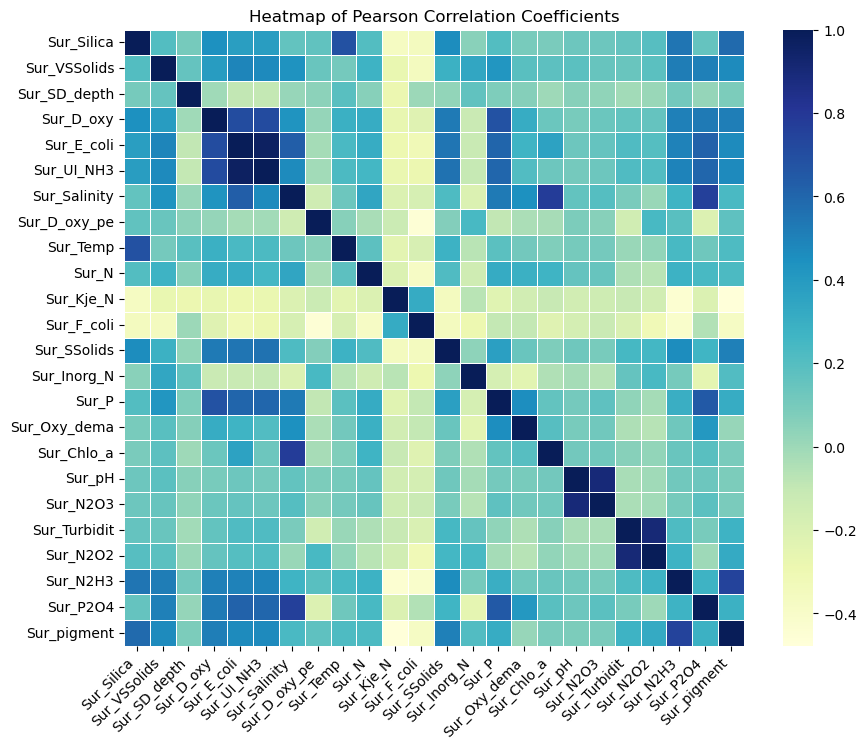

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 读取数据
df = pd.read_csv('Zone1_sur_combine.csv')

# 提取特征列
features = df.columns

# 无量纲化（标准化）
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# 计算皮尔逊相关系数
correlation_matrix = df_scaled.corr(method='pearson')

# 绘制热力图
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(correlation_matrix, cmap='YlGnBu', annot=False, fmt=".2f", linewidths=.5)

# 调整横坐标轴角度
plt.xticks(rotation=45, ha='right')

plt.title('Heatmap of Pearson Correlation Coefficients')
plt.savefig('../pict/analysis_pict/Heatmap of Pearson Correlation Coefficients.png')
plt.show()


PCA分析

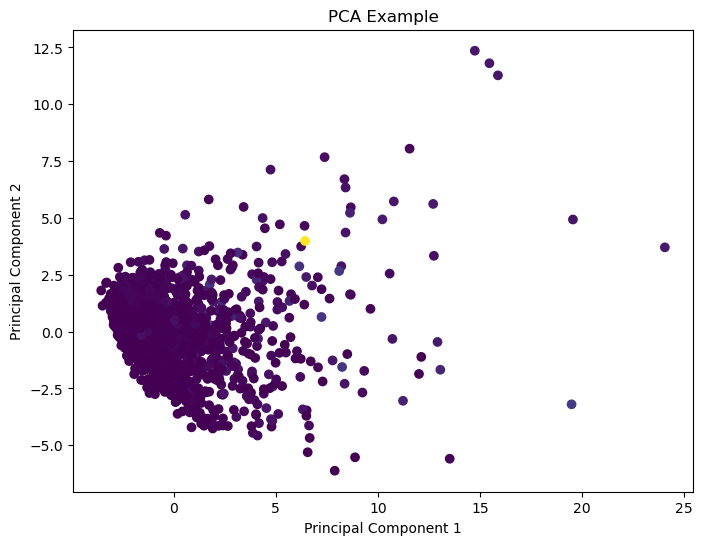

新特征向量上所带的信息量: [6.87903236 2.85400514]
可解释方差贡献率: [0.29891033 0.12401332]
新特征表所带的信息总量为： 0.4229236531291337


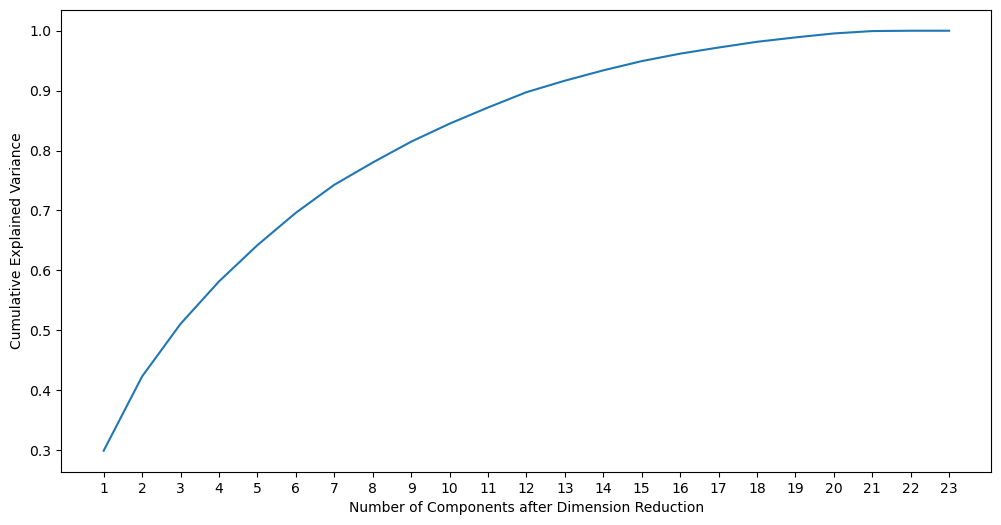

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# 读取数据
df = pd.read_csv('Zone1_sur_combine.csv')

# 提取特征列
features = df.columns.drop('Sur_Chlo_a')

# 无量纲化（标准化）
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# 提取X和y
X = df_scaled
y = df['Sur_Chlo_a']

# 使用PCA进行降维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# 绘制PCA结果的散点图
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.title('PCA Example')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

a = pca.explained_variance_  # 属性explained_variance，查看降维后每个新特征向量上所带的信息量大小（可解释性方差的大小）
print('新特征向量上所带的信息量:', a)
b = pca.explained_variance_ratio_  # 属性explained_variance_ratio，查看降维后每个新特征向量所占的信息量占原始数据总信息量的百分比，又叫做可解释方差贡献率
print('可解释方差贡献率:', b)
c = pca.explained_variance_ratio_.sum()  # 新特征表所带的信息总量
print('新特征表所带的信息总量为：', c)

pca_line = PCA().fit(X)
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(pca_line.explained_variance_ratio_) + 1), np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks(range(1, len(pca_line.explained_variance_ratio_) + 1))  # 使用主成分的数量作为 x 轴刻度值
plt.xlabel("Number of Components after Dimension Reduction")
plt.ylabel("Cumulative Explained Variance")
plt.show()


因子分析

d:\Users\huawei\anaconda3\envs\pytorch\lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO:0.654867417779601 Bartlett:0.0
适用于因子分析
      旋转前特征值  旋转前方差贡献率  旋转前方差累计贡献率
0   6.984857  0.291036    0.291036
1   2.901153  0.120881    0.411917
2   2.020055  0.084169    0.496086
3   1.674238  0.069760    0.565846
4   1.464781  0.061033    0.626879
5   1.266296  0.052762    0.679641
6   1.239167  0.051632    0.731273
7   0.959206  0.039967    0.771240
8   0.849875  0.035411    0.806651
9   0.768827  0.032034    0.838686
10  0.657352  0.027390    0.866075
11  0.587420  0.024476    0.890551
12  0.549946  0.022914    0.913466
13  0.423713  0.017655    0.931120
14  0.393011  0.016375    0.947496
15  0.320714  0.013363    0.960859
16  0.273336  0.011389    0.972248
17  0.227483  0.009478    0.981726
18  0.170136  0.007089    0.988815
19  0.163646  0.006819    0.995634
20  0.091137  0.003797    0.999431
21  0.013392  0.000558    0.999989
22  0.000218  0.000009    0.999998
23  0.000040  0.000002    1.000000
[[ 5.94613569e-01  3.42478781e-01  1.73067956e-01 -4.20889918e-01
   1.60759999e-0

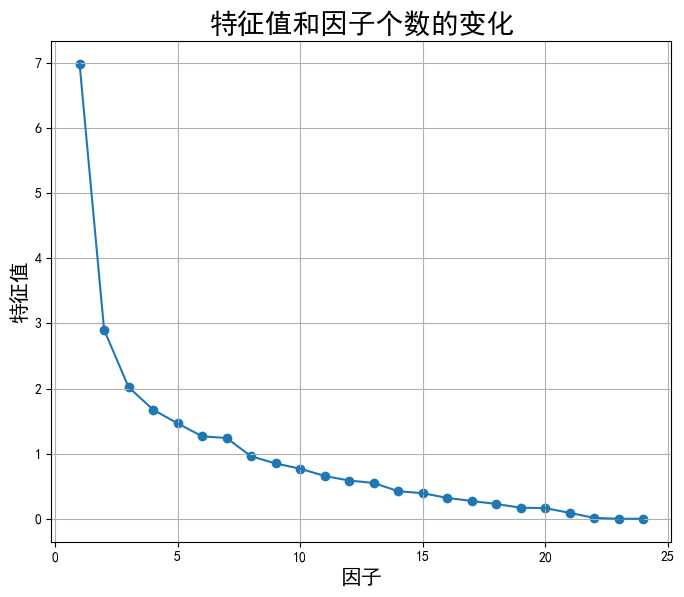

旋转后的载荷矩阵的贡献率
        特征值     方差贡献率   方差累计贡献率
0  5.672576  0.236357  0.236357
1  4.213434  0.175560  0.411917
旋转后的成分矩阵
[[ 0.29570323  0.61920645]
 [ 0.47567033  0.4387365 ]
 [-0.00835548  0.16678352]
 [ 0.7080806   0.35264358]
 [ 0.80028076  0.34622262]
 [ 0.72819988  0.37910936]
 [ 0.83047109 -0.0370436 ]
 [-0.19935376  0.4430892 ]
 [ 0.25722471  0.31926698]
 [ 0.48305114  0.10932542]
 [-0.27664927 -0.48530546]
 [-0.15599825 -0.62944311]
 [ 0.41738184  0.5439352 ]
 [-0.35775734  0.48902763]
 [ 0.78514059  0.06167253]
 [ 0.56319356 -0.13652513]
 [ 0.44764499 -0.02019491]
 [ 0.26258334  0.07846077]
 [ 0.30882617  0.03696339]
 [-0.011368    0.51645361]
 [-0.10584669  0.6679088 ]
 [ 0.39379217  0.67973646]
 [ 0.82243977 -0.02340554]
 [ 0.33697323  0.73324875]]


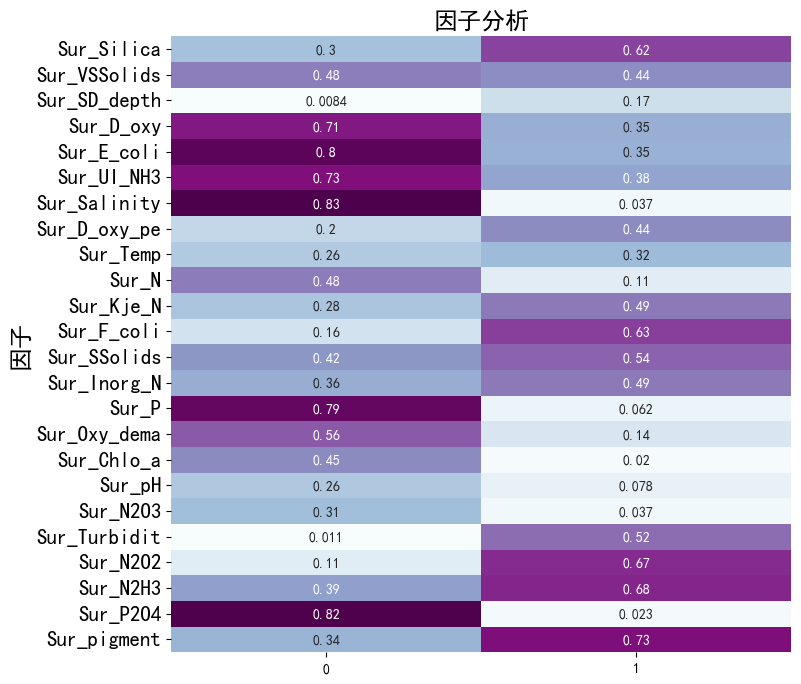

因子得分：
                factor1   factor2
Sur_Silica    0.003211  0.145507
Sur_VSSolids  0.057614  0.078051
Sur_SD_depth -0.017433  0.047474
Sur_D_oxy     0.114041  0.032079
Sur_E_coli    0.133816  0.021604
Sur_UI_NH3    0.115733  0.037594
Sur_Salinity  0.176162 -0.088525
Sur_D_oxy_pe -0.083150  0.142796
Sur_Temp      0.023437  0.065165
Sur_N         0.090150 -0.014856
Sur_Kje_N    -0.011850 -0.109817
Sur_F_coli    0.026801 -0.161520
Sur_SSolids   0.035595  0.112985
Sur_Inorg_N  -0.120409  0.170563
Sur_P         0.157447 -0.056626
Sur_Oxy_dema  0.129951 -0.091220
Sur_Chlo_a    0.094977 -0.047781
Sur_pH        0.047214 -0.002748
Sur_N2O3      0.060734 -0.018716
Sur_Turbidit -0.050967  0.145642
Sur_N2O2     -0.084865  0.196930
Sur_N2H3      0.017909  0.153220
Sur_P2O4      0.173209 -0.083952
Sur_pigment   0.001059  0.173547


In [18]:
from sklearn.decomposition import FactorAnalysis
from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
# KMO和Bartlett球形检验
data = pd.read_csv('Zone1_sur_combine.csv')
kmo = calculate_kmo(data)
bartlett = calculate_bartlett_sphericity(data)
print(f'KMO:{kmo[1]} Bartlett:{bartlett[1]}')
print('适用于因子分析' if kmo[1] > 0.6 and bartlett[1] < 0.05 else '不适用于因子分析')

Load_Matrix = FactorAnalyzer(rotation=None, n_factors=len(data.T), method='principal')
Load_Matrix.fit(data)
f_contribution_var = Load_Matrix.get_factor_variance()
matrices_var = pd.DataFrame()
matrices_var["旋转前特征值"] = f_contribution_var[0]
matrices_var["旋转前方差贡献率"] = f_contribution_var[1]
matrices_var["旋转前方差累计贡献率"] = f_contribution_var[2]
print(matrices_var)
print(Load_Matrix.loadings_)#旋转前的成分矩阵

eigenvalues = 1
N = 0
for c in matrices_var["旋转前特征值"]:
    if c >= eigenvalues:
        N += 1
    else:
        s = matrices_var["旋转前方差累计贡献率"][N-1]
        print("\n选择了" + str(N) + "个因子累计贡献率为" + str(s)+"\n")
        break

matplotlib.rcParams["font.family"] = "SimHei"  
ev, v = Load_Matrix.get_eigenvalues()
print('\n相关矩阵特征值：', ev)
plt.figure(figsize=(8, 6.5))
plt.scatter(range(1, data.shape[1] + 1), ev)
plt.plot(range(1, data.shape[1] + 1), ev)
plt.title('特征值和因子个数的变化', fontdict={'weight': 'normal', 'size': 20})
plt.xlabel('因子', fontdict={'weight': 'normal', 'size': 15})
plt.ylabel('特征值', fontdict={'weight': 'normal', 'size': 15})
plt.grid()
plt.show()

Load_Matrix_rotated = FactorAnalyzer(rotation='varimax', n_factors=2, method='principal')
Load_Matrix_rotated.fit(data)
f_contribution_var_rotated = Load_Matrix_rotated.get_factor_variance()
matrices_var_rotated = pd.DataFrame()
matrices_var_rotated["特征值"] = f_contribution_var_rotated[0]
matrices_var_rotated["方差贡献率"] = f_contribution_var_rotated[1]
matrices_var_rotated["方差累计贡献率"] = f_contribution_var_rotated[2]
print("旋转后的载荷矩阵的贡献率")
print(matrices_var_rotated)
print("旋转后的成分矩阵")
print(Load_Matrix_rotated.loadings_)


Load_Matrix = Load_Matrix_rotated.loadings_
df = pd.DataFrame(np.abs(Load_Matrix),index= data.columns)
 
plt.figure(figsize=(8, 8))
ax = sns.heatmap(df, annot=True, cmap="BuPu",cbar=False)
ax.yaxis.set_tick_params(labelsize=15) # 设置y轴字体大小
plt.title("因子分析", fontsize="xx-large")
plt.ylabel("因子", fontsize="xx-large")# 设置y轴标签
plt.show()# 显示图片

# 计算因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
f_corr = data.corr()# 皮尔逊相关系数
X1 = np.mat(f_corr)
X1 = np.linalg.inv(X1)
factor_score_weight = np.dot(X1, Load_Matrix_rotated.loadings_)
factor_score_weight = pd.DataFrame(factor_score_weight)
col = ["factor" + str(i + 1) for i in range(2)]  # 使用range(N)作为列名
factor_score_weight.columns = col
factor_score_weight.index = f_corr.columns
print("因子得分：\n", factor_score_weight)

PCoA分析

d:\Users\huawei\anaconda3\envs\pytorch\lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.


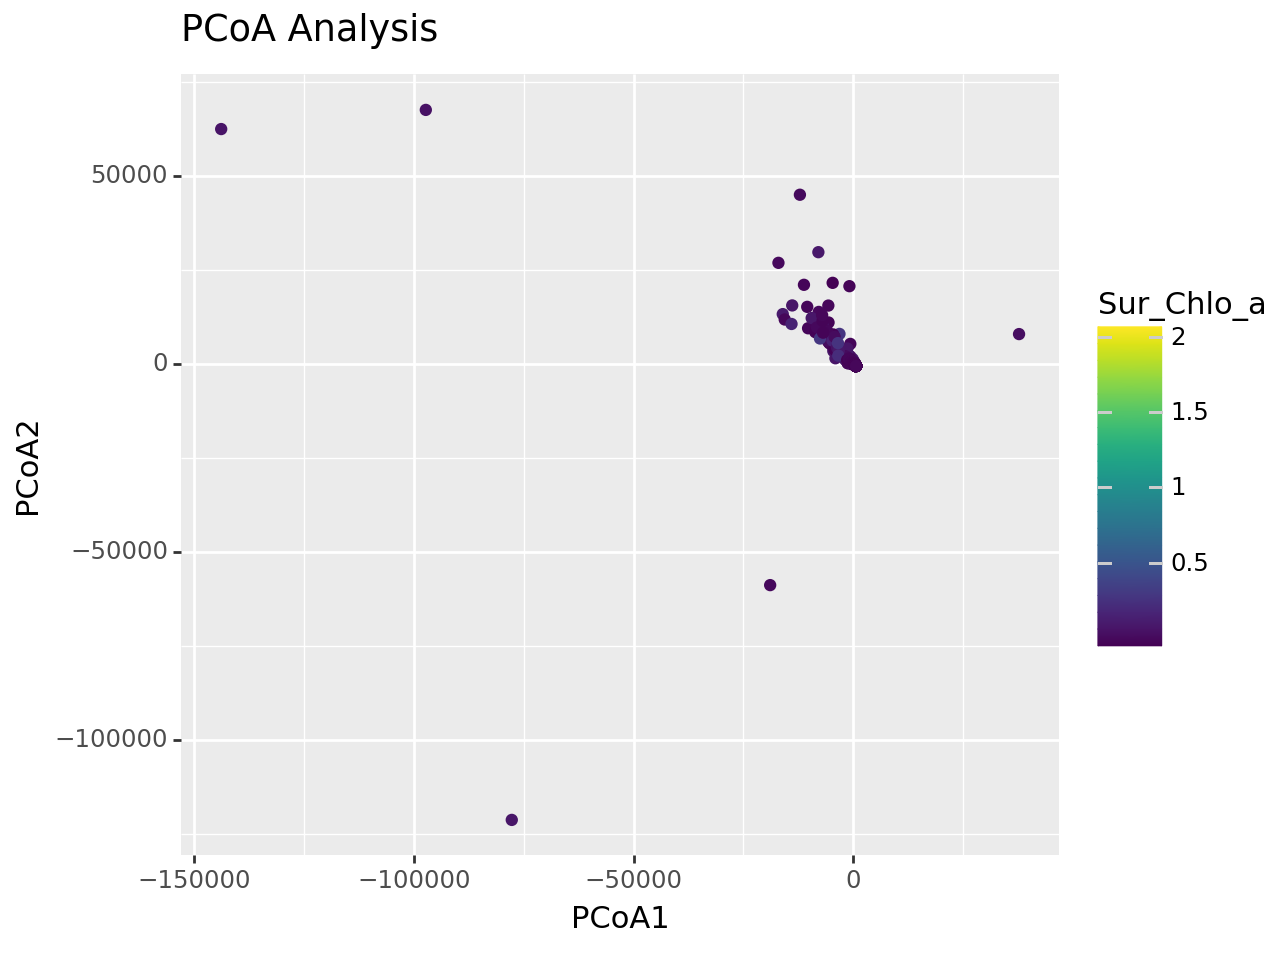

In [2]:
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
from plotnine import ggplot, aes, geom_point, labs

# 读取数据
data = pd.read_csv('Zone1_sur_combine.csv')

# 提取特征列
features = data.columns[1:]

# 计算样本间的距离矩阵
distance_matrix = pairwise_distances(data[features], metric='euclidean')

# 使用MDS进行PCoA
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
X_pcoa = mds.fit_transform(distance_matrix)

# 创建 PCoA 数据框
pcoa_df = pd.DataFrame(X_pcoa, columns=['PCoA1', 'PCoA2'])

# 合并 PCoA 数据框与原始数据
data_with_pcoa = pd.concat([data, pcoa_df], axis=1)

# 使用 plotnine 绘制 PCoA 散点图
p = ggplot(data_with_pcoa, aes(x='PCoA1', y='PCoA2', color='Sur_Chlo_a')) + \
    geom_point() + \
    labs(title='PCoA Analysis', x='PCoA1', y='PCoA2', color='Sur_Chlo_a')

# 显示图形
print(p)
